## **Getting Started**
### **Instructions**
1. Make a Copy of this Colab Notebook in your Drive. To do so:
> * Go to the "File" tab in the top navigation bar.
> * Click on "Save a copy in Drive".
> * Once done, open the copied Colab for editing.

2. Read the questions for each exercise by **adhering to nomenclature used**.
3. Write your code solutions only in the designated cells (**# CODE HERE**).
4. Run any other cells in the sequence they appear.


### **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **NumPy Operations** - *Into the World of Dimensions*

In this section, we will explore different operations that we can perform using numpy efficiently:

For often, while venturing into the world of High-Dimensional Data(one involving multi-dimensional arrays), we often need to summarise its entirety within few dimensions. This process is called Principal Component Analysis (PCA). We walk through the various steps involved from scratch.

Let's create a 2D Numpy Array which we'll represent as a Matrix

Suppose we have this 9 x 5 (N x M) Martix X, indicating that there are 5 points/vectors in 9-dimensional space:
\begin{equation}
X_{N x M} =
\begin{bmatrix}
 6&3&1&6&7 \\
 3&9&2&2&5 \\
 2&3&4&8&5 \\
 4&2&5&1&2 \\
 6&4&1&4&1 \\
 3&0&5&0&0 \\
 2&5&0&7&2 \\
 6&7&5&0&8 \\
 8&2&6&5&2
\end{bmatrix}
\end{equation}

In [ ]:
X = np.array([[6, 3, 2, 4, 6, 3, 2, 6, 8], [3, 9, 3, 2, 4, 0, 5, 7, 2], [1, 2, 4, 5, 1, 5, 0, 5, 6], [6, 2, 8, 1, 4, 0, 7, 0, 5], [7, 5, 5, 2, 1, 0, 2, 8, 2]])
print(X)

[[6 3 2 4 6 3 2 6 8]
 [3 9 3 2 4 0 5 7 2]
 [1 2 4 5 1 5 0 5 6]
 [6 2 8 1 4 0 7 0 5]
 [7 5 5 2 1 0 2 8 2]]


Notice each vector (X<sub>i</sub>) was a **column** when represented in matrix form viz:
\begin{equation}
X_i =
\begin{bmatrix}
 6 \\
 3 \\
 2 \\
 4 \\
 6 \\
 3 \\
 2 \\
 6 \\
 8
\end{bmatrix}
\end{equation}
But NumPy arrays always have Row as a Vector.<br>
So the matrix representation would be the **transpose** of the array **X**:

In [ ]:
print(X.T)

[[6 3 1 6 7]
 [3 9 2 2 5]
 [2 3 4 8 5]
 [4 2 5 1 2]
 [6 4 1 4 1]
 [3 0 5 0 0]
 [2 5 0 7 2]
 [6 7 5 0 8]
 [8 2 6 5 2]]


The first step in the PCA is to Standardise the given matrix.<br> To standardise a matrix, we replace each column vector by subtracting each column vector of the matrix from **the mean vector μ**:<br>
\begin{equation}
\mu = \frac{\sum_{i = 1}^{M}X_i}{M}
\end{equation}
So,
\begin{equation}
\mu =
\frac{
\begin{bmatrix}
 6 \\
 3 \\
 2 \\
 4 \\
 6 \\
 3 \\
 2 \\
 6 \\
 8
\end{bmatrix}
+
\begin{bmatrix}
 3 \\
 9 \\
 3 \\
 2 \\
 4 \\
 0 \\
 5 \\
 7 \\
 2
\end{bmatrix}
+
\begin{bmatrix}
 1 \\
 2 \\
 4 \\
 5 \\
 1 \\
 5 \\
 0 \\
 5 \\
 6
\end{bmatrix}
+
\begin{bmatrix}
 6 \\
 2 \\
 8 \\
 1 \\
 4 \\
 0 \\
 7 \\
 0 \\
 5
\end{bmatrix}
+
\begin{bmatrix}
 7 \\
 5 \\
 5 \\
 2 \\
 1 \\
 0 \\
 2 \\
 8 \\
 2
\end{bmatrix}}{5}
\end{equation}
Hence, each new column of X is now:
\begin{equation}
A_i = X_i - \mu
\end{equation}


### **EXERCISE 1**
Compute the Mean Vector using np.mean() and name it **mean**

In [ ]:
# CODE HERE
mean = np.mean(X, axis = 0)
print(mean)

[4.6 4.2 4.4 2.8 3.2 1.6 3.2 5.2 4.6]


### **EXERCISE 2**
Compute the standardised matrix X after subtracting **mean** from **X** and name it **A** and also find the shape of the A array. Notice that A is N x M matrix while in NumPy array it has the shape M x N.

In [ ]:
# CODE HERE
A = X - mean
print(A)
print(A.shape)

[[ 1.4 -1.2 -2.4  1.2  2.8  1.4 -1.2  0.8  3.4]
 [-1.6  4.8 -1.4 -0.8  0.8 -1.6  1.8  1.8 -2.6]
 [-3.6 -2.2 -0.4  2.2 -2.2  3.4 -3.2 -0.2  1.4]
 [ 1.4 -2.2  3.6 -1.8  0.8 -1.6  3.8 -5.2  0.4]
 [ 2.4  0.8  0.6 -0.8 -2.2 -1.6 -1.2  2.8 -2.6]]
(5, 9)


Now comes the time to compute the **Covariance Matrix** of this new matrix **A**. The covariance matrix (Σ) comes from the Matrix Multiplication of the standardised matrix and its transpose.
\begin{equation}
Σ = \frac{A.A^T}{(M - 1)}
\end{equation}

### **EXERCISE 3**
Compute the Covariance matrix of A using numpy matrix multiplication and call it **cov**. Also find its shape.<br>
Hint: Take care of the shape of the array and recall the matrix representation thing!

In [ ]:
# CODE HERE
cov = (A.T @ A)/(A.shape[0] - 1)
print(cov)
print(cov.shape)

[[ 6.3  -0.65  1.7  -2.35  1.6  -3.45  2.35 -0.4  -0.45]
 [-0.65  8.7  -2.6  -1.7   0.45 -3.65  1.95  5.45 -5.65]
 [ 1.7  -2.6   5.3  -2.4  -1.35 -2.3   3.65 -5.35 -1.3 ]
 [-2.35 -1.7  -2.4   2.7  -0.45  3.65 -3.95  1.55  2.65]
 [ 1.6   0.45 -1.35 -0.45  4.7  -0.65  2.7  -1.55  2.6 ]
 [-3.45 -3.65 -2.3   3.65 -0.65  5.3  -4.9   0.35  4.3 ]
 [ 2.35  1.95  3.65 -3.95  2.7  -4.9   7.7  -5.05 -2.15]
 [-0.4   5.45 -5.35  1.55 -1.55  0.35 -5.05  9.7  -2.9 ]
 [-0.45 -5.65 -1.3   2.65  2.6   4.3  -2.15 -2.9   6.8 ]]
(9, 9)


Last few steps involve computing the Eigenvalues and Eigenvectors of the Covariance Matrix.
### **EXERCISE-4**
Compute the EigenValues and EigenValues of **cov** using NumPy's Linear Algebra. Store them in **EigenValues** and **EigenVectors** named arrays.

In [ ]:
# CODE HERE
EigenValues, EigenVectors = np.linalg.eig(cov)
print(EigenValues)
print(EigenVectors)

[ 2.24470247e+01  2.02940723e+01  8.24600767e+00  6.21289531e+00
 -5.79773474e-16 -1.32941225e-15  9.41005936e-16  6.60060831e-16
 -1.92653887e-17]
[[ 0.27729456 -0.02695638  0.29946301  0.78409967  0.37154866 -0.25608732
  -0.09630427 -0.08493116 -0.23445087]
 [ 0.15749083  0.59511867  0.15755346 -0.34769121  0.32976944 -0.53908005
  -0.16877037 -0.19804171  0.01010402]
 [ 0.33420201 -0.24840423 -0.42196408  0.10794905  0.28053828 -0.56707883
   0.33762381  0.39916343 -0.21393969]
 [-0.34102616 -0.05461303  0.02135916 -0.06361944  0.39396614 -0.35727713
   0.767182    0.67754842 -0.39764369]
 [ 0.09766404 -0.09704498  0.70720343 -0.16572672  0.05987644 -0.15061818
   0.18314382  0.21717053 -0.29344868]
 [-0.44183851 -0.19513124 -0.0371672  -0.14672425  0.65920414 -0.35150137
  -0.27849601 -0.08716906 -0.59183959]
 [ 0.54701291 -0.07393328  0.17686141 -0.31448654  0.15689112  0.18553257
   0.23685724  0.33211429 -0.18810371]
 [-0.30128097  0.58531466  0.10116038  0.31729276 -0.07789081

**NOTE:** The EigenVector array returned actually has the eigenvectors as its columns rather than its rows (unlike the usual NumPy array scenario). So you need to transpose it before proceeding further.

In [ ]:
EigenVectors = EigenVectors.T
print(EigenVectors)

[[ 0.27729456  0.15749083  0.33420201 -0.34102616  0.09766404 -0.44183851
   0.54701291 -0.30128097 -0.27488483]
 [-0.02695638  0.59511867 -0.24840423 -0.05461303 -0.09704498 -0.19513124
  -0.07393328  0.58531466 -0.42996112]
 [ 0.29946301  0.15755346 -0.42196408  0.02135916  0.70720343 -0.0371672
   0.17686141  0.10116038  0.4049166 ]
 [ 0.78409967 -0.34769121  0.10794905 -0.06361944 -0.16572672 -0.14672425
  -0.31448654  0.31729276  0.00531674]
 [ 0.37154866  0.32976944  0.28053828  0.39396614  0.05987644  0.65920414
   0.15689112 -0.07789081 -0.22466769]
 [-0.25608732 -0.53908005 -0.56707883 -0.35727713 -0.15061818 -0.35150137
   0.18553257  0.10692987 -0.04991248]
 [-0.09630427 -0.16877037  0.33762381  0.767182    0.18314382 -0.27849601
   0.23685724  0.29489116 -0.07429772]
 [-0.08493116 -0.19804171  0.39916343  0.67754842  0.21717053 -0.08716906
   0.33211429  0.39708541 -0.11146597]
 [-0.23445087  0.01010402 -0.21393969 -0.39764369 -0.29344868 -0.59183959
  -0.18810371 -0.038558

The next task is to arrange the rows of the **EigenVectors** Array based upon the indices of the Eigenvalues in descending order.<br>
Look at the following routine:

In [ ]:
indices = np.array([3, 2, 4, 0, 1])
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
print(f"The Original Array:\n{arr}\n")
print(f"The array with Rows rearranged according to the indices:\n{arr[indices]}")

The Original Array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]

The array with Rows rearranged according to the indices:
[[10 11 12]
 [ 7  8  9]
 [13 14 15]
 [ 1  2  3]
 [ 4  5  6]]


### **EXERCISE-5**
Arrange the Eigenvectors(the rows of the **EigenVectors** Array) corresponding to the values of the **EigenValues** Array(in descending order) following a routine similar to the above.

In [ ]:
# CODE HERE
eig_new = EigenVectors[np.argsort(EigenValues)[::-1]]
print(eig_new)

[[ 0.27729456  0.15749083  0.33420201 -0.34102616  0.09766404 -0.44183851
   0.54701291 -0.30128097 -0.27488483]
 [-0.02695638  0.59511867 -0.24840423 -0.05461303 -0.09704498 -0.19513124
  -0.07393328  0.58531466 -0.42996112]
 [ 0.29946301  0.15755346 -0.42196408  0.02135916  0.70720343 -0.0371672
   0.17686141  0.10116038  0.4049166 ]
 [ 0.78409967 -0.34769121  0.10794905 -0.06361944 -0.16572672 -0.14672425
  -0.31448654  0.31729276  0.00531674]
 [-0.09630427 -0.16877037  0.33762381  0.767182    0.18314382 -0.27849601
   0.23685724  0.29489116 -0.07429772]
 [-0.08493116 -0.19804171  0.39916343  0.67754842  0.21717053 -0.08716906
   0.33211429  0.39708541 -0.11146597]
 [-0.23445087  0.01010402 -0.21393969 -0.39764369 -0.29344868 -0.59183959
  -0.18810371 -0.03855819  0.51747854]
 [ 0.37154866  0.32976944  0.28053828  0.39396614  0.05987644  0.65920414
   0.15689112 -0.07789081 -0.22466769]
 [-0.25608732 -0.53908005 -0.56707883 -0.35727713 -0.15061818 -0.35150137
   0.18553257  0.106929

### **EXERCISE-6**
Extract only the first **K** rows of this rearranged array and store them in an array named **W**. Also find the shape of **W**.

In [ ]:
K = 2

In [ ]:
# CODE HERE
W = eig_new[:K]
print(W)
print(W.shape)

[[ 0.27729456  0.15749083  0.33420201 -0.34102616  0.09766404 -0.44183851
   0.54701291 -0.30128097 -0.27488483]
 [-0.02695638  0.59511867 -0.24840423 -0.05461303 -0.09704498 -0.19513124
  -0.07393328  0.58531466 -0.42996112]]
(2, 9)


The Final Step of Dimensionality Reduction (PCA) involves the multiplication of the standardised matrix **A** with this **W** matrix:
\begin{equation}
X_{new} = A_{M x N}^{T}.W_{N x K}
\end{equation}
Notice that the Reduced Version of **X** is of the Dimension **M x K**. Hence we have arrived from an **N**-dimensional space to a smaller **K**-dimensional space while keeping the number of points **M** same still yet extracting the max amount of information from the original data!!

In [ ]:
X_New = A @ W.T
print(X_New)
print(X_New.shape)

[[-3.18925611 -1.67105261]
 [ 2.05931366  5.56411557]
 [-6.02081425 -2.16537435]
 [ 6.1791359  -5.40494495]
 [ 0.97162079  3.67725635]]
(5, 2)


In python, we have come from (5, 9) to (5, 2). Now we can easily plot these 5 points in 2D which initially were in 9D.
### **EXERCISE-7**
Plot these 5 points using MatPlotLib.

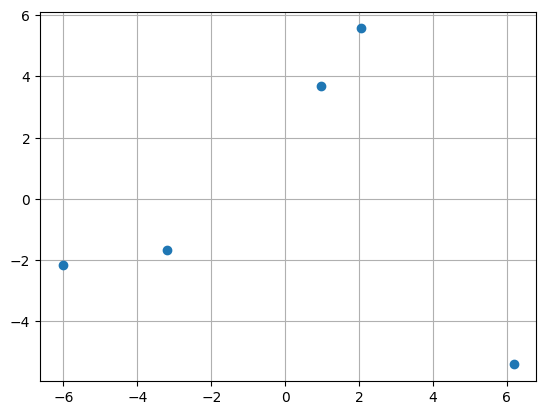

In [ ]:
# CODE HERE
plt.plot(X_New[:, 0], X_New[:, 1], "o")
plt.grid()
plt.show()